Nous disposons ici d'une base de donnée contenant les prix de biens immobiliers de la vile d'Ames (Etats-Unis).

L'objectif est de construire un modèle d'apprentissage permettant de prédire les prix de vente (**SalePrice**) de biens immobiliers dans la ville d'Ames aux Etats-Unis en fonction de leurs cartactéristiques. 

Nous disposons pour cela de 1460 données. Pour une description de chaqune des variables, se réferérer à l'annexe.
Les données 
L'étude sera faite à l'aide du logiciel Python.

# Feature engineering 

Dans cette partie, nous reformatons, traitons et enrichissons les données à notre disposition.

## Préparation des données 

Dans un premiers temps, nous allons préparer les données afin de construire le modèle le plus efficace.

La base de données possède au total $80$ variables :

Varibles quantitatives : 

**1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold.**

Variables qualitative : 

**Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities.**

In [1]:
import pandas as pd
from tabulate import tabulate




In [10]:
#!pip install --upgrade pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from pylab import pcolor, show, colorbar, xticks, yticks
plt.style.use("ggplot") #uniquement esthétique

#print(pd.__version__)

ames = pd.read_csv('/Users/florentvalbon/Desktop/Année 2019:2020/ML/projet/train.csv',  sep = ',')

In [71]:
#print(ames.info())

Cependant, comme nous pouvons le constater en annexe, $19$ variables ne possèdent pas $1460$ valeurs valides ("not-null"), ce qui signifie qu'elles possèdent des données manquantes. Nous aurions pu remplacer les données manquantes par d'autres valeurs (la moyenne ou médianne de chaque variable par exemple), mais nous avons déjà beaucoup de variables par rapport au nombre de données, et pour ne prendre aucun risque, nous les supprimerons de notre tableau.

Nous commençons tout d'abord par suprimmer la colonne **Id** (identifiant des clients) puisqu'elle ne nous permettra pas de prédire le prix des biens immobiliers.

Voici les premières lignes de notre tableau de données avec $61$ variables.

In [3]:
del ames['Id']
ames = ames.dropna(axis = 1)
 
#print(ames.iloc[0:5,0:7].to_markdown())

|    |   MSSubClass | MSZoning   |   LotArea | Street   | LotShape   | LandContour   | Utilities   |
|---:|-------------:|:-----------|----------:|:---------|:-----------|:--------------|:------------|
|  0 |           60 | RL         |      8450 | Pave     | Reg        | Lvl           | AllPub      |
|  1 |           20 | RL         |      9600 | Pave     | Reg        | Lvl           | AllPub      |
|  2 |           60 | RL         |     11250 | Pave     | IR1        | Lvl           | AllPub      |
|  3 |           70 | RL         |      9550 | Pave     | IR1        | Lvl           | AllPub      |
|  4 |           60 | RL         |     14260 | Pave     | IR1        | Lvl           | AllPub      |

Nous transformons les variables qualitatives de type texte en variables numériques afin d'appliquer les algorithmes de Machine Learning. 
Pour la plupart des variables qualitatives nous effectuerons un one-hot encoding : on créera une variable binaire par modalité (égale à 1 ou 0). 

En revanche, pour les variables **ExterQual**, **ExterCond**, **HeatingQC** (qualité du chauffage), **KitchenQual** (qualité de la cuisine), **Functional** (fonctionnalités), **FireplaceQu** (qualité de la cheminée) et **PavedDrive** qui représentent une évaluation, il sera bien plus pertinant de les tranformer en variables ordinales car les modalités sont ordonnées par satisfaction. De **Na =0** à **Ex = 5** par exemple.


Pour la variable **MSSubclass** (type d'habitation), même si les valeurs sont numériques, il s'agit d'une variable qualiative, puisqu'elle représente le type de domicile, nous lui appliquerons alors un one-hot encoding (chaque modalité sera tranformé en variable binaire).



In [4]:
#qualitative to ordinal quantitative

for feature in ames.columns.values:
    if  feature in ['ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'PavedDrive']:
        ames[feature] = ames[feature].map({'P': 1, 'Y':2, 'Slope':0, 'Mod':1, 'Gtl':2, 'NA': 0, 'N' : 0, 'Sal': 0, 'Po' : 1, 'Unf': 1, 'RFn' : 1, 'Sev ':1, 'Fa': 2, 'Maj2':3, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6, 'TA': 3, 'Fin' :3, 'Gd' : 4, 'Ex' : 5, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}) 

#one-hot encoding
feature_dummies = [0 for i in range(100)]
quant_features_d = []
quant_feature = []
k = 0
for feature in ames.columns.values:
    if ames[feature].dtype == np.object:
        # create dummy variables for categorical features
        feature_dummies[k] = pd.get_dummies(ames[feature], prefix = feature)
        quant_features_d.append(feature_dummies[k])
        k+=1
        quant_feature.append(feature)


#concatenate dummy columns with main dataset
ames_dummies = pd.concat([ames] + quant_features_d, axis=1)
# drop categorical fields
ames_dummies.drop(quant_feature, axis=1, inplace=True)
        
    

#lotG2

# Convert the male and female groups to integer form
#titanic.Sex = titanic.Sex.map({"male": 0, "female":1})

#pclass_dummies = pd.get_dummies(titanic.Pclass, prefix="Pclass")
#title_dummies = pd.get_dummies(titanic.Title, prefix="Title")
#cabin_dummies = pd.get_dummies(titanic.Cabin, prefix="Cabin")
#embarked_dummies = pd.get_dummies(titanic.Embarked, prefix="Embarked")
#concatenate dummy columns with main dataset
#ames_dummies = pd.concat([ames, feature_dummies], axis=1)

# drop categorical fields
#titanic_dummies.drop(['Pclass', 'Title', 'Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

#titanic_dummies.head()

## Exploration des données

Les $10$ variables les plus linéairement (négativement ou positivement) corrélés au prix du logement sont :

In [74]:
corr_matrix = ames.corr()
#print(corr_matrix['SalePrice'].reindex(corr_matrix['SalePrice'].abs().sort_values(ascending = False).index)[0:10])


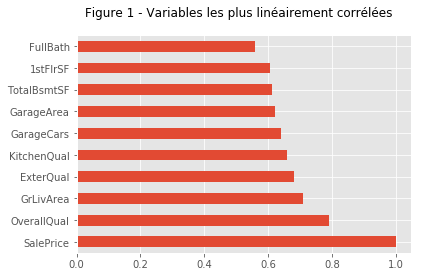

In [150]:
CM = corr_matrix['SalePrice'].reindex(corr_matrix['SalePrice'].abs().sort_values(ascending = False).index)[0:10]
CM.plot(kind = 'barh')
plt.suptitle('Figure 1 - Variables les plus linéairement corrélées')
plt.show()


Vu le nombre important de variables, concentrons nous pour l'instant sur ces variables les plus prometteuses.

|    |   SalePrice |   OverallQual |   GrLivArea |   GarageArea |   ExterQual |   TotalBsmtSF |   1stFlrSF |
|---:|------------:|--------------:|------------:|-------------:|------------:|--------------:|-----------:|
|  0 |      208500 |             7 |        1710 |          548 |           4 |           856 |        856 |
|  1 |      181500 |             6 |        1262 |          460 |           3 |          1262 |       1262 |
|  2 |      223500 |             7 |        1786 |          608 |           4 |           920 |        920 |
|  3 |      140000 |             7 |        1717 |          642 |           3 |           756 |        961 |
|  4 |      250000 |             8 |        2198 |          836 |           4 |          1145 |       1145 |

In [60]:
#ames_dummies[['SalePrice','OverallQual','GrLivArea', 'GarageArea','ExterQual','TotalBsmtSF','1stFlrSF']].head().to_markdown())

Les histogrammes de ces variables montrent que les variables ont des échelles très différentes, cela peux réduire l'éfficacité de certains algorithmes d'apprentissage comme la régression ridge par exemple. D'autre part, plusieurs histogrammes sont fortement dissymétriques, ils s'étendent bien plus loin à droite de la médiane qu'à gauche, ce qui peut être un problème, car certains algorithmes d'apprentissages peut avoir plus de mal à détecter les structurations.

Notons également que les variables **GarageArea** (aire du garage), et **TotalBsmtSF** (aire du sous sol) contiennent une quantité qui semble à première vue annormalement élevée de zéros. En réalité, cela coorespond au fait que certains logements n'ont pas de garage ou pas de sous sol, ou aucun des deux.

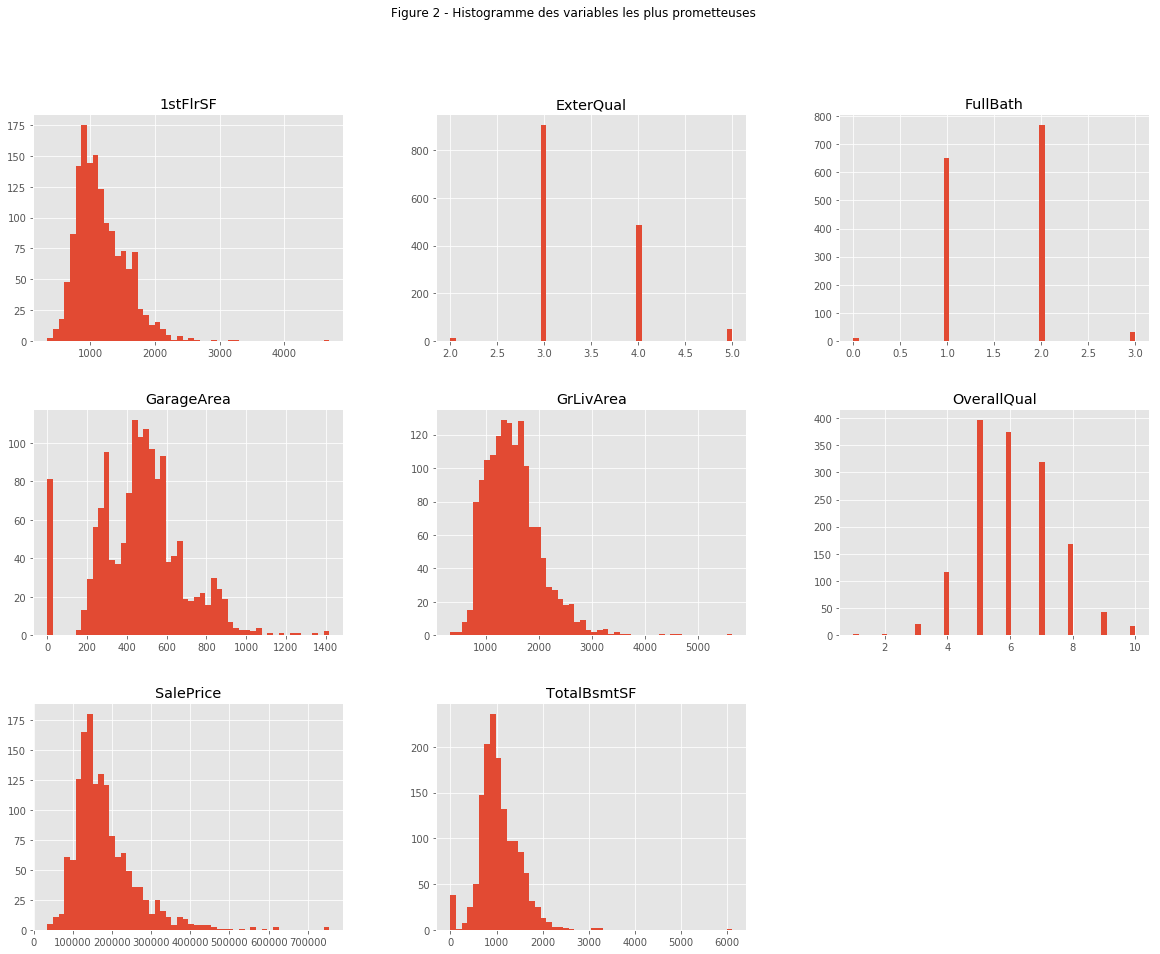

In [154]:

ames_dummies[['SalePrice','OverallQual','GrLivArea', 'GarageArea','ExterQual','TotalBsmtSF','1stFlrSF','FullBath']].hist(bins = 50, figsize =(20,15))
plt.suptitle('Figure 2 - Histogramme des variables les plus prometteuses')
plt.show()


## Création de nouvelles variables

**Date d'achat**

Nous allons créer quelques variables pertinantes afin d'améliorer la précision de la prédiction.

La date de l'achat pourrait expliquer le prix de vente (pour des raisons économiques). Nous allons donc créer la variable **DateSold**, définie par :
$$ DateSold = YrSold + \frac{1}{12}(MoSold - 1).$$

Cette variable prends en compte l'année (**YrSold**) et le mois (**MoSold**) de l'achat du bien immobilier.

In [155]:
ames_dummies['DateSold'] = ames_dummies['YrSold']+(1/12)*(ames_dummies['MoSold'])

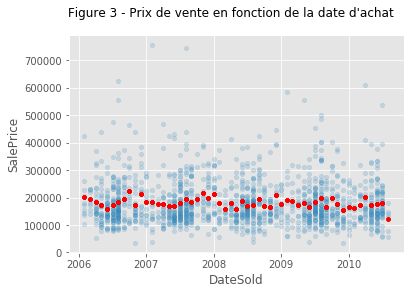

In [157]:
ames_dummies.plot(kind ="scatter", x = "DateSold", y = "SalePrice", alpha = 0.2)
#il serait interessant d'évaluer la tendance moyenne en fonction 
#l'année (il faudait y réfléchir)
L = [(ames_dummies['SalePrice'][ames_dummies['DateSold'] == i]).mean() for i in ames_dummies['DateSold']]
plt.plot(ames_dummies['DateSold'], L, '.', color = 'red')
plt.suptitle("Figure 3 - Prix de vente en fonction de la date d'achat")
plt.show()
del ames_dummies['YrSold']
del ames_dummies['MoSold']

Nous avons tracé la moyenne des prix en fonction de la date d'achat (au mois près). Il est très clair qu'il y a des tendance de prix en fonction de la période auquel le logement a été acheté.

D'autre part, le prix moyen fluctue beaucoup trop en une année, et il est très clair que l'année d'achat (même si elle influe sans doute) ne permet pas à elle seule d'expliquer le prix d'un logement, et peux induire l'agorithme d'apprentissage en erreur. Nous supprimons donc la variable **YrSold**.

Enfin le mois à lui seul ne peux suffire à expliquer le logement : par exemple, le prix de vente était en moyenne significativement plus élevé en début 2006, qu'au début de l'année 2010. Nous supprimons donc aussi la variable **MoSold**. 

**Finition de l'ensemble**

Il est judiscieux d'associer la qualité des mathériaux **OverallQual** avec l'aire de la surface habitable du logement **GrLivArea**.

On crée donc la varaible : $$QualValue = OverallQual \times GrLivArea$$
qui représente la valeur en termes de matériaux du bien immobilier.

Comme prévu, cette nouvelle variable est plus corrélé que **OverallQual** et **GrLivArea**.

In [159]:
ames_dummies['QualValue'] = ames_dummies['OverallQual']*ames_dummies['GrLivArea']
#corr_matrix2 = ames_dummies.corr()
#corr_matrix2['SalePrice'].sort_values(ascending = False)[0:10]

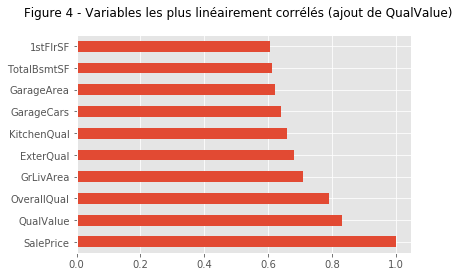

In [80]:
CM2 = corr_matrix2['SalePrice'].reindex(corr_matrix2['SalePrice'].abs().sort_values(ascending = False).index)[0:10]
CM2.plot(kind = 'barh')
plt.suptitle('Figure 4 - Variables les plus linéairement corrélées (ajout de QualValue)')
plt.show()

Graphiquement, la corrélation est manifestement très forte, il apparait clairement une tendence croissante, et les points ne sont pas trop dispersés.

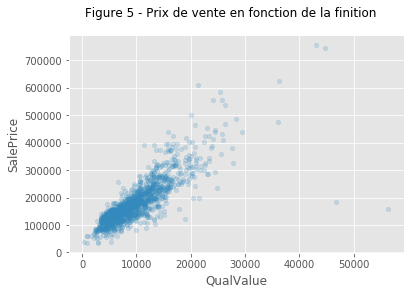

In [81]:
ames_dummies.plot(kind ="scatter", x = "QualValue", y = "SalePrice", alpha = 0.2)
plt.suptitle('Figure 5 - Prix de vente en fonction de la finition')
plt.show()
#ames.plot(kind ="scatter", x = "GrLivArea", y = "SalePrice", alpha = 0.2)
#ames.plot(kind ="scatter", x = "GarageCars", y = "SalePrice", alpha = 0.2)
#ames.plot(kind ="scatter", x = "GarageArea", y = "SalePrice", alpha = 0.2)

Si on observe le prix des bien immobilier en fonction de leur valeur (en terme de matériaux), deux données sont à l'écart (en bas à droite). Elles ne sont peut être pas aberrantes, mais elles ne reflettent en tout cas pas la tendance des prix. Ce sont deux cas trop particuliers qui peuvent induire le modèle en erreur. Nous allons donc les supprimer de notre jeu de données.

In [160]:
ames_dummies = ames_dummies[ames_dummies['QualValue'].between(0, 45000)]


**Valeur des cuisines**

Créeons également la variable :
$$KitchenValue = KitchenAbvGr \times KitchenQual$$
Qui dépend de la surface des cuisines et de leurs qualités, et donne la valeur de l'ensemble des cuisines par logement. 

In [162]:
#print(ames_dummies['KitchenQual'].value_counts())
ames_dummies['KitchenValue'] = ames_dummies['KitchenAbvGr']*ames_dummies['KitchenQual']

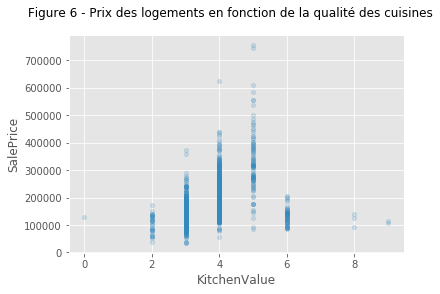

In [163]:
ames_dummies.plot(kind ="scatter", x = "KitchenValue", y = "SalePrice", alpha = 0.2)
plt.suptitle('Figure 6 - Prix des logements en fonction de la qualité des cuisines')
plt.show()

## Transformation des varibles

L'histogramme des prix de vente est assymétrique.

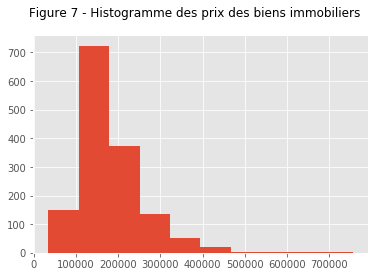

In [164]:
#ames['2ndFlrSF']
#logarithm
ames['SalePrice'].hist()
plt.suptitle('Figure 7 - Histogramme des prix des biens immobiliers')
plt.show()


In [166]:
#ames_dummies['SalePrice'] = np.log(ames_dummies['SalePrice'])

 Nous travaillons donc avec le logarithme du prix.

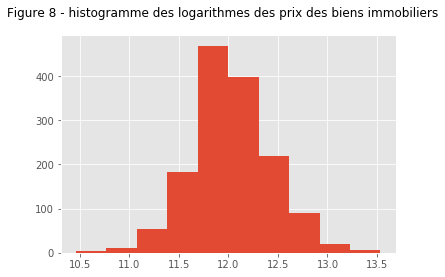

In [167]:
ames_dummies['SalePrice'].hist()
plt.suptitle('Figure 8 - histogramme des logarithmes des prix des biens immobiliers')
plt.show()

Les histogrammes des variables **GrLivArea** et **1stFlrSF** étant également assymétrique, nous travaillerons aussi avec le logarithme de ses variables.

In [169]:
#ames_dummies['GrLivArea'] = np.log(ames_dummies['GrLivArea'])
#ames_dummies['1stFlrSF'] = np.log(ames_dummies['1stFlrSF'])

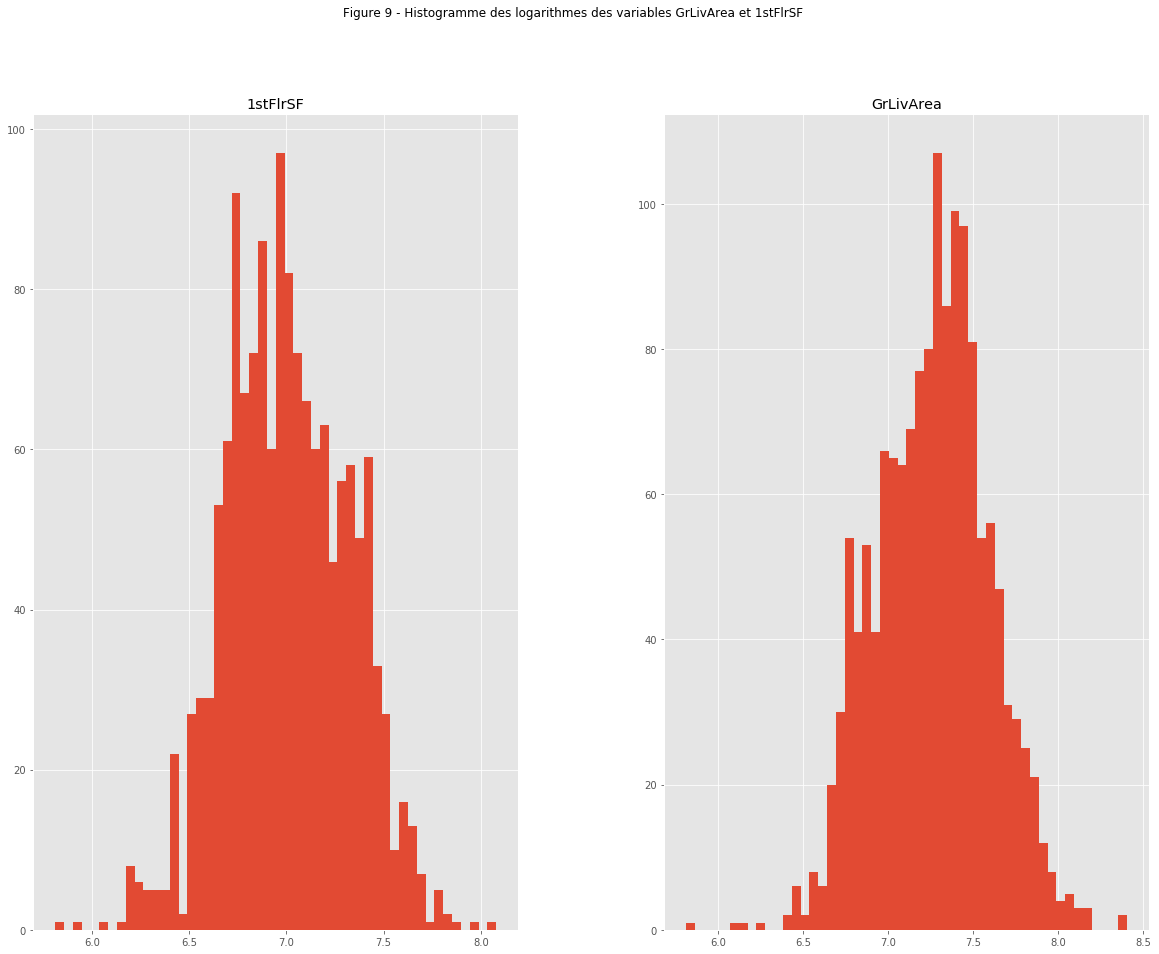

In [170]:
ames_dummies[['GrLivArea','1stFlrSF']].hist(bins = 50, figsize =(20,15))
plt.suptitle('Figure 9 - Histogramme des logarithmes des variables GrLivArea et 1stFlrSF' )
plt.show()



In [48]:
#ames_dummies.iloc[0:5,0:5]

In [49]:
#ames_dummies.iloc[0:5,8:13]
#ames_dummies[[feature for feature in ames_dummies.columns[ames_dummies.columns != 'SalePrice']]]

In [50]:
#ames_dummies.iloc[0:5,-5:-1]

Enfin, afin de garantir l'éfficacité de l'apprentissage, nous allons standardiser les données d'apprentissages.

Si $X$ est une variable, alors on la renplacera par :

$$\frac{X-X_{min}}{X_{max}-X_{min}}$$

Ainsi, toutes les variables d'apprentissage seront à la même échelle, entre $0$ et $1$. Toutefois, une telle mise à l'échelle donnera trop d'importance aux valeurs extrêmes, mais c'est sans doute mieux que de ne rien faire, et mieux encore que de faire une normalisation, qui risque de rendre certaines des variables que nous avons créeés **Qualvalue** et **KitchenValue** non petinentes (car les variables dont elles dépendent doivent être nulles et positives).

In [96]:
#normalisation
from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df = ames_dummies
#df[[feature for feature in ames_dummies.columns[ames_dummies.columns != 'SalePrice']]] = scaler.fit_transform(ames_dummies[[feature for feature in ames_dummies.columns[ames_dummies.columns != 'SalePrice']]])


Voici à quoi ressemble le tableau de données :

In [100]:
#df[['SalePrice','OverallQual','GrLivArea', 'GarageArea','ExterQual']].iloc[0:5,:]

|    |   SalePrice |   OverallQual |   GrLivArea |   GarageArea |   ExterQual |
|---:|------------:|--------------:|------------:|-------------:|------------:|
|  0 |     12.2477 |      0.666667 |    0.629245 |     0.394245 |    0.666667 |
|  1 |     12.109  |      0.555556 |    0.512191 |     0.330935 |    0.333333 |
|  2 |     12.3172 |      0.666667 |    0.646    |     0.43741  |    0.666667 |
|  3 |     11.8494 |      0.666667 |    0.630819 |     0.461871 |    0.333333 |
|  4 |     12.4292 |      0.777778 |    0.725978 |     0.601439 |    0.666667 |

In [77]:
#df_to_markdown(df.head())

## Création d'un jeu de test

Nous utiliserons 20% des données comme données de test (prises aléatoirement).

In [101]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)


Les 80% autres seront utilisées pour l'apprentissage.

In [113]:
#from sklearn import decomposition
#from sklearn import preprocessing
#from functions import *


#int64_features = []
#for feature in ames.columns.values:
    #if ames[feature].dtype == np.int64:
        #int64_features.append(feature)


#ames.columns.values

# choix du nombre de composantes à calculer
#n_comp = 8

# selection des colonnes à prendre en compte dans l'ACP
#feats = [feature for features in ames.columns.values]

#df2 = ames.select_dtypes(include = 'int64')
#print(df2)
#data_pca = ames[[feature for feature in ames.columns.values if (ames[feature].dtype == np.int64 or feature == 'SalePrice')]]
#print(data_pca)
# préparation des données pour l'ACP

#X = data_pca.values
#names = ames.index # ou data.index pour avoir les intitulés
#features = ames.columns

# Centrage et Réduction
#std_scale = preprocessing.StandardScaler().fit(X)
#X_scaled = std_scale.transform(X)

# Calcul des composantes principales
#pca = decomposition.PCA(n_components=n_comp)
#pca.fit(X_scaled)

# Eboulis des valeurs propres
#display_scree_plot(pca)

# Cercle des corrélations
#pcs = pca.components_
#display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
#X_projected = pca.transform(X_scaled)
#display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)])
#plt.show()

# Entraînement du modèle

Nous allons à présent entraîner un modèle de Machine Learning. 

## Choix du modèle de Machine Learning 

Dans un premier temps, nous allons entraîner plusieurs modèles de Machine Learning et comparer leurs résultats. Les résultats sont obtenus par validation croisée (en $10$ passes) : le jeu d'entraînement est aléatoirement découpé en $10$ blocs distincts, puis effectue l'entraînement puis l'évaluation du modèle en $10$ passes successives, réservant à chaque fois un bloc différent pour l'évaluation et effectuant l'entraînement sur les neufs autres blocs.

L'étude des corrélations à mis en avant le caractère (plus ou moin) linéaire des corrélations entre la variable cible et les variables d'apprentissage les plus pertinentes. Nous allons donc commençer par entraîner un modèle de régression linéaire.

**Régression linéaire**

Pour un simple modèle de régression linéaire, l'erreur quadratique moyenne de prévison est extrêmement elevée. Le modèle est en effet bien plus complexe. Si la variable cible est plus ou moin linéaire en plusieurs variables, le modèle possède une centaine de variables binaires (rajoutés par one-hot encoding). Il n'est donc pas linéaire. 
D'autre part, nous disposons de seulement de 1200 données d'entraînement pour 201 variables. Le risque de cela est celui du fleau de dimension : les données sont beaucoup trop éloignées entre elles. Enfin, trop de variables sont colinéaires entre elles (comme par exemple **garageCars** et **garageArea**), ce qui a pour effet d'augmenter très fortement la variables des estimateurs.

In [120]:
#df[df.columns != 'SalePrice']
Df =train_set[[feature for feature in df.columns[df.columns != 'SalePrice']]]


In [122]:
#Réalisons pour commencer l'entraînement sur un modèle de régréssion linéaire :

#ames = pd.read_csv('/Users/florentvalbon/Desktop/Année 2019:2020/ML/projet/train.csv',  sep = ',')

#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error
#lin_reg = LinearRegression()
#RMSE 
#résultat exellent
#lin_reg.fit(Df,train_set['SalePrice'])
#np.sqrt(mean_squared_error(train_set['SalePrice'],lin_reg.predict(Df)))
#print('Pédictions:', lin_reg.predict(Df.iloc[0:20]))
#nb :ce résultat n'a pas bcp de valeur ( à retirer du compte rendu)

In [134]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, Df, train_set['SalePrice'], scoring = "neg_mean_squared_error", cv = 10)


cross_val_score = np.sqrt(-score)
print('Scores :', score)
print('RMSE =', cross_val_score.mean())
print('Ecart-type =', cross_val_score.std())
RMSE = cross_val_score.mean()

Scores : [ -2.65864879e+13  -1.46548120e+20  -1.29021613e+18  -5.06276762e+18
  -2.50959432e+17  -1.15486128e+21  -1.83916567e+19  -2.10393249e+19
  -2.59532086e+19  -2.35818482e+17]
RMSE = 6443646156.95
Ecart-type = 9789931664.27


**k plus proches voisins**

L'algorithme des k plus proches voisins donne de bien meilleurs résultats. Pour chaque nouveau point du bloc de test, on calcule la distance avec certains points du bloc d'entrainement.
On sélectionne uniquement les k distances les plus petites (les k plus proches voisins). On détermine quel est le prix de vente moyen des k plus proches voisins. On associe à notre logement sans prix, le prix moyen des k plus proches voisins. On prend $k = 10$.

In [135]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score


knn = KNeighborsRegressor(n_neighbors = 10)
#knn.fit(Df,df['SalePrice'])
#np.sqrt(mean_squared_error(df['SalePrice'],knn.predict(Df)))
score1 = cross_val_score(knn, Df, train_set['SalePrice'], scoring = "neg_mean_squared_error", cv = 10)


cross_val_score = np.sqrt(-score1)
print('Scores :', score1)
print('RMSE =', cross_val_score.mean())
print('Ecart-type =', cross_val_score.std())
RMSE1 = cross_val_score.mean()

Scores : [-0.03406212 -0.04679205 -0.05073771 -0.0396465  -0.04894333 -0.07216178
 -0.05500661 -0.04742576 -0.05418495 -0.03501581]
RMSE = 0.218731055063
Ecart-type = 0.023545400688


**Séparateur à vaste marge linéaire**

Les séparateurs à vaste marge linéaires donnent des résultats encore meilleurs. L'algorithme va trouver un chemin qui contiendra le plus d'obsevations que possible tout en limitant les empiétements de marge (c'est à dire les observations hors du chemin). La lageur de la marge est contrôlée par le paramètre $\epsilon$. Les prédictions se trouvent sur la droite au milieu du chemin. $\epsilon = 0.01$ donne un résultat correct :

In [137]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_val_score
#pb de convergence
svm_reg = LinearSVR(epsilon = 0.01)
svm_reg.fit(Df,train_set['SalePrice'])
score2 = cross_val_score(svm_reg, Df, train_set['SalePrice'], scoring = "neg_mean_squared_error", cv = 10)



In [138]:

cross_val_score = np.sqrt(-score2)

print('Scores :', score2)
print('RMSE =', cross_val_score.mean())
print('Ecart-type =', cross_val_score.std())
RMSE2 = cross_val_score.mean()

Scores : [-0.01308274 -0.0172515  -0.02271844 -0.03160594 -0.01274105 -0.02675246
 -0.01385174 -0.0100915  -0.01337047 -0.01137038]
RMSE = 0.129108239611
Ecart-type = 0.0247928239312


In [135]:
#from sklearn.svm import SVR
#from sklearn.model_selection import cross_val_score
#pb de convergence
#poly_kernel_svm_reg = SVR(gamma = "auto")
#poly_kernel_svm_reg.fit(Df,df['SalePrice'])
#score4 = cross_val_score(poly_kernel_svm_reg, Df, train_set['SalePrice'], scoring = "neg_mean_squared_error", cv = 10)
#cross_val_score = np.sqrt(-score4)
#cross_val_score.mean()

**Forêt aléatoire**

Il s'agit ici d'entraîner $100$ arbres de décision par une méthode de type **bagging**. Le score est correct.

In [127]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


rnd_reg = RandomForestRegressor(n_estimators = 100)
rnd_reg.fit(Df,train_set['SalePrice'])
score3 = cross_val_score(rnd_reg, Df, train_set['SalePrice'], scoring = "neg_mean_squared_error", cv = 10)
cross_val_score = np.sqrt(-score3)

print('Scores :', score3)
print('RMSE =', cross_val_score.mean())
print('Ecart-type =', cross_val_score.std())
RMSE3 = cross_val_score.mean()



Scores : [-0.01498238 -0.01963444 -0.02760154 -0.01964936 -0.01981083 -0.02700245
 -0.02057687 -0.01232203 -0.01535245 -0.01399454]
RMSE = 0.137056854182
Ecart-type = 0.0175530285564


Observons l'importance des variables par les forêts aléatoires (c'est à dire, l'influence qu'elles ont sur les RMSE des neuds dans chaque arbre de la forêt aléatoire). Comme attendu, la variable **QualValue** qui mesure la qualité d'un bien imobilier (le produit de sa taille par la qualité du matériaux) est de loin la variable la plus importante.

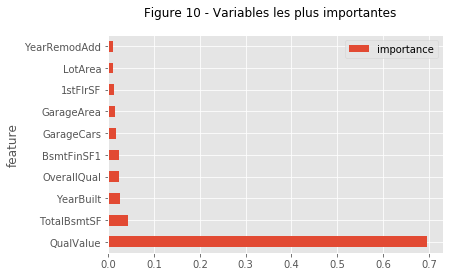

In [129]:
importances = pd.DataFrame({'feature':Df.columns,'importance':np.round(rnd_reg.feature_importances_,5)})
importances = importances.sort_values('importance',ascending=False)
importances.head(10)
importances[0:10].plot('feature','importance','barh')
plt.suptitle('Figure 10 - Variables les plus importantes')
plt.show()

In [143]:
#importances = pd.DataFrame({'feature':Df.columns,'importance':np.round(rnd_reg.feature_importances_,5)})
#importances = importances.sort_values('importance',ascending=True).set_index('feature')
#importances.head(100)

In [150]:
#list(Df.columns.values)

In [37]:
#Df2  = Df.drop(Df.columns.values[rnd_reg.feature_importances_<0.00001], axis=1)

In [38]:
#Df2.head()



In [149]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.model_selection import cross_val_score

#tree_reg= DecisionTreeRegressor()
#tree_reg.fit(Df,df['SalePrice'])
#score3 = cross_val_score(tree_reg, Df, train_set['SalePrice'], scoring = "neg_mean_squared_error", cv = 10)
#cross_val_score = np.sqrt(-score3)
#cross_val_score.mean()

Nous avions effectué une régréssion linéaire précédement, mais l'erreur était très elevée. Cela est peut être du au fait que nous surajustons trop les données. 
Nous allons remédier à ce problème à l'aide de régressions linéaires régularisés. L'objectif est d'éviter le surapprentissage en imposant des contraintes aux coefficients de pondération du modèle. Nous noterons $\theta_i$ les coeffcients de pondération (à estimer) du modèle.

**Régression ridge**

Il s'agit d'éffectuer une régression linéaire en ajoutant un terme de régularisation égal à $\alpha \frac{1}{2} \sum_{i = 1}^{n} {\theta_i}^2$. Ce terme de régularisation n'est ajouté que durant l'entraînement, et permet de maintenir les coefficients de pondération aussi petits que possibles.
Nous choisissons $\alpha = 10$. Le résultat est tout à fait satisfaisant.

In [139]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge_reg= Ridge(alpha = 10)
#ridge_reg.fit(Df,df['SalePrice'])
score4 = cross_val_score(ridge_reg, Df, train_set['SalePrice'], scoring = "neg_mean_squared_error", cv = 10)
cross_val_score = np.sqrt(-score4)
print('Scores :', score4)
print('RMSE =', cross_val_score.mean())
print('Ecart-type =', cross_val_score.std())
RMSE4 = cross_val_score.mean()

Scores : [-0.00919402 -0.01523688 -0.01789486 -0.01200975 -0.01012032 -0.0220017
 -0.01425411 -0.0098152  -0.01561223 -0.01117607]
RMSE = 0.116074156945
Ecart-type = 0.0160718906185


**Régression lasso (version linéaire)**

Nous ajoutons cette fois le terme de régularisation $\alpha \sum_{i=0}^{n} \mid \theta_i \mid$. De cette façon, nous éliminerons le poids des variables les moins impotantes (cela reglera le fleau de dimension, et le problème de multicolinéarité). Or, dans notre modèle, la variable **QualValue**, qui augmente linéairement avec le prix des logement, est très importante. Nous prendons $\alpha = 0.001$, le résultat est satisfaisant:

In [140]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

lasso_reg= Lasso(alpha = 0.001)
#lasso_reg.fit(Df,df['SalePrice'])
score5 = cross_val_score(lasso_reg, Df, train_set['SalePrice'], scoring = "neg_mean_squared_error", cv = 10)
cross_val_score = np.sqrt(-score5)
print('Scores :', score5)
print('RMSE =', cross_val_score.mean())
print('Ecart-type =', cross_val_score.std())
RMSE5 = cross_val_score.mean()

Scores : [-0.00875187 -0.01414061 -0.02096722 -0.0135279  -0.01093977 -0.02074409
 -0.01366218 -0.00910406 -0.01250649 -0.01016885]
RMSE = 0.114717095956
Ecart-type = 0.0170672755314


**Régression lasso (version polynômiale de degré 2)** 

Une régression polynômiale ne donne pas un meilleur résultat :

In [141]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso


lasso_reg= Lasso(alpha = 0.001)



poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(Df)
#ridge_reg= Ridge(alpha = 100)
#ridge_reg.fit(Df,df['SalePrice'])
lin_reg2 = LinearRegression()
#RMSE 
#résultat exellent
#lin_reg2.fit(X_poly,df['SalePrice'])
score6 = cross_val_score(lasso_reg, X_poly, train_set['SalePrice'], scoring = "neg_mean_squared_error", cv = 10)
cross_val_score = np.sqrt(-score6)


In [142]:
print('Scores :', score6)
print('RMSE =', cross_val_score.mean())
print('Ecart-type =', cross_val_score.std())
RMSE6 = cross_val_score.mean()

Scores : [-0.00884901 -0.01396144 -0.02157716 -0.0140588  -0.01019673 -0.02209601
 -0.01649142 -0.01027082 -0.01379449 -0.01029856]
RMSE = 0.117601107324
Ecart-type = 0.0181500414421


**Elastic Net**

Enfin, effectuons un compromis entrela régression ridge et lasso, en ajoutant un terme de régularisation égal à $r \alpha \sum_{i = 1}^{n} \mid \theta_i \mid + \frac{1 - r}{2} \alpha \sum_{i = 1}^{n} {\theta_i}^2$.

In [143]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score

elastic_net= ElasticNet(alpha = 0.001, l1_ratio = 0.5)
#elastic_net.fit(Df,df['SalePrice'])
score7 = cross_val_score(elastic_net, Df, train_set['SalePrice'], scoring = "neg_mean_squared_error", cv = 10)
cross_val_score = np.sqrt(-score7)


In [144]:
print('Scores :', score7)
print('RMSE =', cross_val_score.mean())
print('Ecart-type =', cross_val_score.std())
RMSE7 = cross_val_score.mean()

Scores : [-0.00799219 -0.01432989 -0.01905629 -0.01267494 -0.0101258  -0.01965955
 -0.01293596 -0.00821042 -0.01286179 -0.01023292]
RMSE = 0.111948910716
Ecart-type = 0.0165956531758


**Meilleurs modeles**

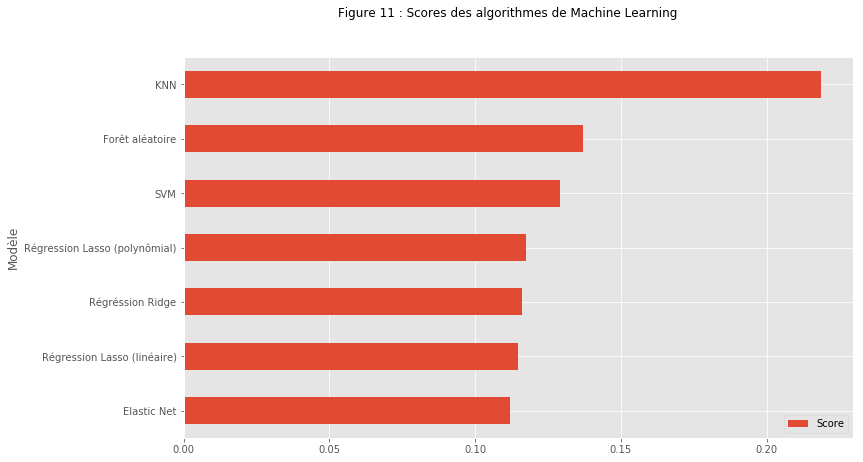

In [146]:
results = pd.DataFrame({
    'Modèle': ['KNN', 'SVM', 
              'Forêt aléatoire', 'Régréssion Ridge', 
              'Régression Lasso (linéaire)', 'Régression Lasso (polynômial)',
              'Elastic Net'],
    'Score': [RMSE1, RMSE2, 
              RMSE3, RMSE4, RMSE5, 
              RMSE6, RMSE7]})

results
result_df = results.sort_values(by='Score')
#result_df = result_df.set_index('Score')
result_df.head(9)
result_df.plot('Modèle', 'Score', 'barh', figsize =(12,7), legend = True)
plt.suptitle('Figure 11 : Scores des algorithmes de Machine Learning')
plt.show()

Les modèles Elastic Net, régression Lasso et  régréssion Ridge semblent être les plus prometteurs (leurs scores sont plus faibles).

## Optimisation des paramètres

Nous allons donc, à l'aide d'une grille de recherche, optimiser les paramètres de chacun des algoithmes de Machine Learning sélectionnés.

**Régression Lasso**

Le meilleur score apparait alors que l'algorithme n'a pas encore convergé (280 itérations). Cela signifie que l'algorithme allait commencer à surajuster les données d'entrainement. 

In [255]:
#from sklearn.model_selection import GridSearchCV
#param_grid = [
#   {'alpha' : [0.00032,0.00034,0.00036], 'fit_intercept' : [True, False], 'normalize' : [True, False], 'max_iter' : [220,240,260,280,320]}
#]

#lasso_reg= Lasso()
#grid_search = GridSearchCV(lasso_reg, param_grid, cv = 10, scoring = 'neg_mean_squared_error')
#grid_search.fit(Df,train_set['SalePrice'])


In [252]:
print('meilleurs paramètres :', grid_search.best_params_)
print('RMSE = ', np.sqrt(-grid_search.best_score_))

meilleurs paramètres : {'alpha': 0.00034, 'fit_intercept': True, 'max_iter': 280, 'normalize': False}
RMSE =  0.11271976246124565


**Elastic net**

La grille de recherche nous donne les résultats suivants :

In [237]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
#param_grid = [
   #{'alpha' : [0.0002,0.0004,0.0006,0.0008, 0.001], 'l1_ratio' : [0.34,0.36,0.38,0.4,0.42], 'fit_intercept': [True, False], 'normalize' : [True, False]}
#]
#elastic_net = ElasticNet()
#grid_search = GridSearchCV(elastic_net, param_grid, cv = 10, scoring = 'neg_mean_squared_error')
#grid_search.fit(Df,train_set['SalePrice'])




In [233]:
print('meilleurs paramètres :', grid_search.best_params_)
print('RMSE = ', np.sqrt(-grid_search.best_score_))

meilleurs paramètres : {'alpha': 0.0008, 'fit_intercept': True, 'l1_ratio': 0.42, 'normalize': False}
RMSE =  0.1129157266594135


**Ridge**

La grille de recherche nous donne les résultats suivants :

In [259]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
param_grid = [
   {'alpha' : [0.2,0.22,0.24,0.26,0.28], 'fit_intercept': [True, False], 'normalize' : [True, False]}
]
#ridge_reg = Ridge()
#grid_search = GridSearchCV(ridge_reg, param_grid, cv = 10, scoring = 'neg_mean_squared_error')
#grid_search.fit(Df,train_set['SalePrice'])



In [254]:
print('meilleurs paramètres :', grid_search.best_params_)
print('RMSE = ', np.sqrt(-grid_search.best_score_))

meilleurs paramètres : {'alpha': 0.26, 'fit_intercept': True, 'normalize': True}
RMSE =  0.11548175334517577


# Modèle final

La régression Lasso donne finalement les meilleurs résultats. Afin de diminuer le score et éviter le sur apprentissage, nous allons utiliser une méthode de type bagging. Il s'agit de créer plusieurs sous échantillon de notre ensemble de données (par boostrap), et de réaliser l'apprentissage (avec la régression Lasso) sur chacun des échantillons. Le modèle final est une moyenne des sous modèles obtenus. On entraînera un ensemble de $2000$ modèles, chaqun d'entre eux étant entraîné sur $700$ obsevations tirées au hasard avec remise dans le jeu d'entraînement.

In [257]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score

bag_reg = BaggingRegressor(Lasso(alpha = 0.00034,max_iter = 280, fit_intercept = True, normalize = False), n_estimators = 2000, max_samples = 700, bootstrap = False, n_jobs = -1)
final_score = cross_val_score(bag_reg, Df, train_set['SalePrice'], scoring = "neg_mean_squared_error", cv = 10)
cross_val_score = np.sqrt(-final_score)
print('RMSE = ', cross_val_score.mean())
print('Variance = ', cross_val_score.std())



RMSE =  0.11092311261445467
Variance =  0.015792125763358523


In [261]:
#test_set

Le score est encore meilleur que celui obtenu par la régression Lasso.

# Prédictions

Voici les prédictions obtenues par notre modèle sur le jeu de données test. 
Le fichier "result.csv" en annexe contient toutes les prédictions des données test.

In [ ]:
#from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import r2_score

#bag_reg.fit(Df, train_set['SalePrice'])

In [319]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

X_test = test_set[[feature for feature in df.columns[df.columns != 'SalePrice']]]
Predictive_Model = pd.DataFrame({
        "SalePrice": np.exp(bag_reg.predict(X_test))})
Predictive_Model = Predictive_Model.round(decimals=0)
print('\n \n Valeurs réelles : \n \n ', np.exp(test_set['SalePrice']), '\n \n Prédiction : \n \n', Predictive_Model.set_index(test_set.index))
final_rmse = np.sqrt(mean_squared_error(bag_reg.predict(X_test),test_set['SalePrice']))
final_mae = mean_absolute_error(bag_reg.predict(X_test),test_set['SalePrice'])
final_r2 = r2_score(bag_reg.predict(X_test),test_set['SalePrice'])


print('\n Erreur moyenne quadratique de prédiction :', final_rmse)
print('Erreur moyenne absolue de prédiction :', final_mae)
print('Coefficient de détermination R2 :', final_r2)

print('\n Erreur moyenne quadratique de prédiction en dollard:', round(np.sqrt(mean_squared_error(np.exp(bag_reg.predict(X_test)),np.exp(test_set['SalePrice'])))), '$')
print('Erreur moyenne absolue de prédiction en dollard:', round(mean_absolute_error(np.exp(bag_reg.predict(X_test)),np.exp(test_set['SalePrice']))), '$')
#print('Coefficient de détermination R2 en dollard :', r2_score(np.exp(bag_reg.predict(X_test)),np.exp(test_set['SalePrice'])), '$')






 
 Valeurs réelles : 
 
  1322    190000.0
837     100000.0
413     115000.0
522     159000.0
1036    315500.0
          ...   
479      89471.0
1361    260000.0
1415    175900.0
651     108000.0
722     124500.0
Name: SalePrice, Length: 292, dtype: float64 
 
 Prédiction : 
 
       SalePrice
1322   224322.0
837    100813.0
413    100190.0
522    164868.0
1036   292514.0
...         ...
479    122316.0
1361   261897.0
1415   220735.0
651    108606.0
722    118872.0

[292 rows x 1 columns]

 Erreur moyenne quadratique de prédiction : 0.11565103716976916
Erreur moyenne absolue de prédiction : 0.08275108203474563
Coefficient de détermination R2 : 0.9104516484996132

 Erreur moyenne quadratique de prédiction en dollard: 19862.0 $
Erreur moyenne absolue de prédiction en dollard: 14215.0 $


In [320]:
#Predictive_Model.set_index(test_set.index).to_csv('./result.csv')

In [108]:
#!jupyter nbconvert "Prédiction des prix de vente de biens immobiliers dans la ville d'Ames Machine Learning".ipynb --to latex --no-prompt
  

# Conclusion

Une erreur moyenne absolue de 14 215 \$ est finalement assez élevée. Cependant, si le modèle créé ne permet pas de prédire précisément le prix d'un logement, il nous donne un ordre de grandeur tout à fait satisfaisant surtout que le prix moyen d'un logemement dans la ville d' Ames, parmis les données relevées, est de 180 823 \$. Cela fait donc, en moyenne, une erreur de $7.9\%$ du prix d'un logement. 

Il serait peut être possible de faire mieux, mais il faudrait davantage de données (pour certaines variables, plusieurs données manquaient) : nous aurions pu estimer les valeurs manquantes pour palier à ce problème.  

# Annexe

**Informations sur les des variables**

In [11]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC